The data set given for the project is from "https://archive beta.ics.uci.edu/ml/datasets/productivity+prediction+of+garment+employees"  and is cited as Productivity Prediction of Garment Employees. (2020). UCI Machine Learning Repository. . The data file is attached as csv file. The following are details being provided . The data contains details on actual productivty of a garment industry, the data has been recorded on a day to day basis from the year 2015 to almost year end of 2015. Each quarter represents one week in a month. The days beyond 28 days are considered as quarter 5 which can be ignored. The data set at first needs to be examined and the structure of the data set needs to be understood. The data has been recorded in terms of the following details
    1. Date
    2. Quarter (Four Quarters)
    3. Department (Sewing and Finishing)
    4. Day (Please note the way data is recorded is that based on a dept and productivity is recorded for various lines in each dept, hence you would find multiple productivity recorded for each combination of vairables such as team, dept, smv, date)
    5. Team
    6. Targeted_Producitivity (Target which needs to be achieved)
    7. SMV (Standard Minute Value) : Standard time for a Task in this case you can take standard time to complete a garment
    8. WIP (Work in progress)
    9. Over_time
    10. Incentive
    11. Idle_time
    12. Idle_men (Idle workers)
    13. no_of_style_change
    14. no_of_workers
    15. Actual_Producitivity
The aim is of this project is to obtain an understanding of the data and decipher the relationship among the variables, understanding what possible variables can affect producivity which can be whether overtime or team size or number of worker or department type or a day (like monday ect...) ect.. have an effect.

Suppose the manager is interested in the following questions

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import f_oneway
# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import plotly.express as px


In [2]:
df = pd.read_csv('Data/garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Exploratory Data Analysis & Descriptive Statistics

1. Basic Summary statistics of the data for the numerical variables
2. basic Summary of the data for the number of working days, count of quarters in the year
3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
4. Number count for sewing and finishing department
5. Mean and standard deviation of actual producivity for sewing and finishing Histogram plot of actual productivity based on both department and conclusion accordingly
6. Number count for  teams, smv across the year
7. Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly
8. Find correlation matrix and draw heat map for all variables
9. Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
10. Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
11. Based on the above details of EDA and Descriptive statisitcs analysis what would you say could be the possible factors which can affect producitivity.

In [5]:
#1 Basic summary statistics for numerical columns
print("Basic Summary Statistics for Numerical Variables:", end='\n')
df.describe().T

Basic Summary Statistics for Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [6]:
#2 Basic Summary of the data for the number of working days, count of quarters in the year

# Unique working days
print(f"Total Unique Working Days: {df['date'].nunique()}", end='\n\n')

# Count of records per quarter
print('Count of Records per Quarter:', end=' ')
df['quarter'].value_counts().sort_index()

Total Unique Working Days: 59

Count of Records per Quarter: 

quarter
Quarter1    360
Quarter2    335
Quarter3    210
Quarter4    248
Quarter5     44
Name: count, dtype: int64

In [7]:
# 3. Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly


# Interactive histogram by quarter
fig = px.histogram(df, 
                   x='actual_productivity', 
                   color='quarter', 
                   barmode='stack',   # Use 'stack' for stacked bars if preferred
                   opacity=0.7,
                   title='Actual Productivity Distribution by Quarter')

fig.update_layout(bargap=0.2)
fig.show()

# Most productivity clusters around 0.8
# Noticeable low productivity < 0.5 exists
# Q1 & Q2 dominate high productivity range
# Q3 & Q4 lower contribution to high productivity
# Quarter 5 present — needs removal as per project
# Few records > 1.0 — possible over-performance or data issue

In [8]:
#4. Number count for sewing and finishing department

print("Count of Records in Sewing Department:", df['department'].value_counts(), sep='\n')

Count of Records in Sewing Department:
department
sewing       691
finishing    506
Name: count, dtype: int64


In [9]:
# Q5: Mean and standard deviation of actual productivity for sewing and finishing
dept_summary = df.groupby('department')['actual_productivity'].agg(['mean', 'std']).reset_index()
print(dept_summary)

# Histogram plot by department
fig = px.histogram(df, 
                   x='actual_productivity', 
                   color='department', 
                   pattern_shape='department',
                   barmode='overlay', 
                   opacity=0.7, 
                   title='Actual Productivity Distribution by Department')
fig.show()


  department      mean       std
0  finishing  0.752951  0.197021
1     sewing  0.722013  0.154784


In [10]:
# Q6: Count of unique teams and SMV values
print(f"Total Unique Teams: {df['team'].nunique()}")
print(f"Total Unique SMV values: {df['smv'].nunique()}")


Total Unique Teams: 12
Total Unique SMV values: 70


In [11]:
# Q7: Histogram of productivity by day
fig = px.histogram(df, 
                   x='actual_productivity', 
                   color='day', 
                   barmode='overlay', 
                   opacity=0.7, 
                   title='Productivity Distribution by Day')
fig.show()

# Boxplot by team size
fig = px.box(df, 
             x='no_of_workers', 
             y='actual_productivity', 
             title='Productivity vs Team Size')
fig.show()

# Boxplot by quarter
fig = px.box(df, 
             x='quarter', 
             y='actual_productivity', 
             title='Productivity vs Quarter')
fig.show()


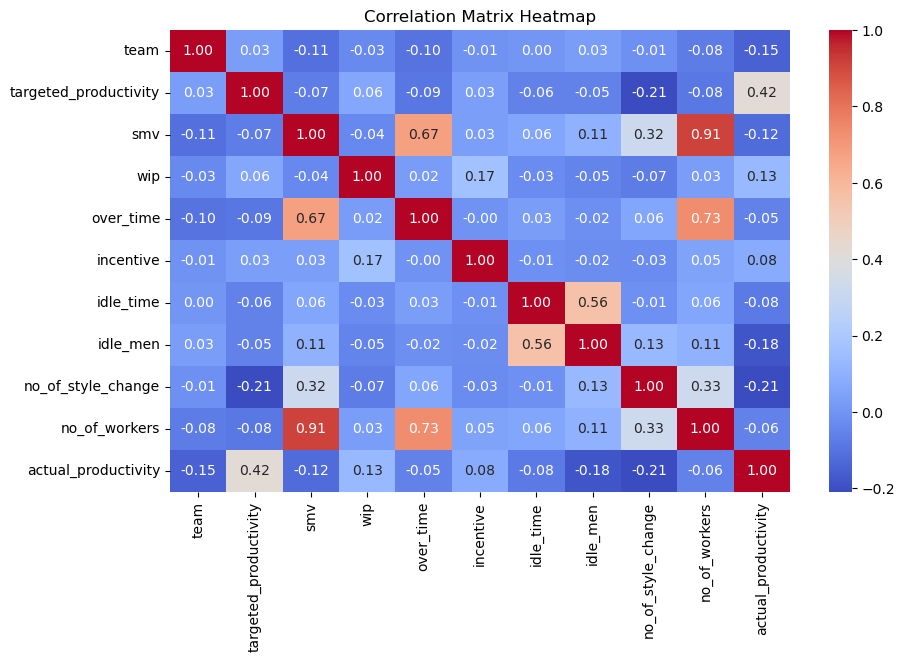

In [12]:
# Q8: Correlation matrix & heatmap

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Conclusion:
# Positive correlation: targeted_productivity & actual_productivity
# Overtime shows mild positive correlation with productivity
# Incentives weakly correlated with productivity


In [13]:
# Q9: Is company meeting target? Do incentives/overtime impact productivity?

df[['actual_productivity', 'targeted_productivity', 'incentive', 'over_time']].corr()


,actual_productivity,targeted_productivity,incentive,over_time
actual_productivity,1.000000,0.421594,0.076538,-0.054206
targeted_productivity,0.421594,1.000000,0.032768,-0.088557
incentive,0.076538,0.032768,1.000000,-0.004793
over_time,-0.054206,-0.088557,-0.004793,1.000000


In [14]:
# Compute correlation matrix (selected columns)
corr_matrix = df[['actual_productivity', 'targeted_productivity', 'incentive', 'over_time']].corr().round(2)

# Reset index for Plotly
corr_matrix_reset = corr_matrix.reset_index().melt(id_vars='index')

# Create interactive heatmap
fig = px.imshow(corr_matrix, 
                text_auto=True, 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix Heatmap')

fig.show()

# Heatmap Observations (Short Points)
# Actual vs Target Productivity → 0.42 → Moderate positive relationship
# Actual Productivity vs Incentive → 0.08 → Very weak positive relationship
# Actual Productivity vs Overtime → -0.05 → Very weak negative relationship
# Target Productivity vs Incentive → 0.03 → Negligible relationship
# Target Productivity vs Overtime → -0.09 → Weak negative relationship
# Incentive vs Overtime → 0.00 → No meaningful relationship

# Quick Takeaway
# ✔ Targets impact productivity moderately
# ✔ Incentives & overtime have minimal or no clear effect
# ✔ Ineffective alignment between rewards (incentives) and output

# Is the company meeting the target?
# Correlation between actual & target productivity: 0.42 (Moderate positive)
# ✔ Some alignment exists — higher targets tend to result in higher actual productivity
# ⚠ But it's not strong enough — company is partially meeting targets, with room for improvement

# Do incentives impact productivity?
# Correlation with productivity: 0.08 (Very weak positive)
# ✔ Minimal impact
# ⚠ Incentive structure is largely ineffective — either poorly designed or other factors dominate productivity

# Does overtime impact productivity?
# Correlation with productivity: -0.05 (Very weak negative)
# ✔ More overtime does not improve productivity
# ⚠ May suggest fatigue, inefficiency, or poor work planning during overtime



In [15]:
# Q10: Correlation of actual vs target productivity for every quarter
for q in sorted(df['quarter'].unique()):
    subset = df[df['quarter'] == q]
    corr_val = subset['actual_productivity'].corr(subset['targeted_productivity'])
    print(f"Quarter {q} - Correlation: {corr_val:.2f}")

# Correlation by department
for dept in df['department'].unique():
    subset = df[df['department'] == dept]
    corr_val = subset['actual_productivity'].corr(subset['targeted_productivity'])
    print(f"Department {dept} - Correlation: {corr_val:.2f}")



Quarter Quarter1 - Correlation: 0.49
Quarter Quarter2 - Correlation: 0.43
Quarter Quarter3 - Correlation: 0.39
Quarter Quarter4 - Correlation: 0.35
Quarter Quarter5 - Correlation: 0.48
Department sewing - Correlation: 0.70
Department finishing - Correlation: 0.10


In [16]:
#11

Hypothesis Testing

12. Test using Z test (take a random sample of more than 30 and assume sigma =.1) whether the finishing department has achieved more acheived producitivity than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05

13. Test using Z test(take a random sample of more than 30 and assume sigma =.1) whether the sewing department has achieved more producitivit than .75 for a standard deviation of .1. State your null and alternative hypothesis. alpha value is .05.

14. Conduct a two sample t test (take a random sample more than 30) to check whether the finishing department has achieved more actual productivtiy than sewing     department. State your null and alternative hypothesis

15. Conduct a two sample t (take a random sample less than 30) test to check whether the finishing department has achieved obtained higher incentive than sewing department, state your null and alternative hypothesis. In case test fails for normality check, then take a sample more than 30.

16. The manager has asked you to classifiy low productivity as less than .5, medium between .5 and less than .75 and higher
    as greater than or equal to .75. He believes that the percentage of  actual producvity  in  sewing departemnt for   
    person classified as low is 30%, for medium is 40% and for high is 30%. USing chi square test can you prove whether his
    hypothesis is right or not

17. Based on the EDA analysis the manager has decided to find out whether different quarters are having an impact on actual productivity. Assuming normality of data conduct an analysis accordingly Conduct an ANOVA for comparing productivity for Quarter1, Quarter2, Quarter3, Quarter 4 and accordingly conclude (Assume data is normally distributed)

18. In case the manager is interested whether day and quarters have an impact on actual producitivity, provide an analysis and identify which factors play a role in affecting productivty

19. Based on 17 eliminate one of the variabes which is not significant and reconduct analysis using deparment as another variable, what do you conclude.

20. Based on EDA and Hypothesis would you aggree or disaggree with the finding, also in addition summarize the findings based on both analysis and provide a recommendation on what you can thinking on improving the producitivity.


In [17]:
# Q12: Z-test for Finishing Dept Productivity > 0.75

finishing_data = df[(df['department'] == 'Finishing') & (df['actual_productivity'].notna())]['actual_productivity']
available_count = finishing_data.count()
print(f"Available Finishing records: {available_count}")

sample_size = min(40, available_count)

if available_count >= 30:
    finishing_sample = finishing_data.sample(sample_size, random_state=42)
    sample_mean = finishing_sample.mean()
    
    sigma = 0.1
    mu = 0.75
    z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
    p_value = 1 - stats.norm.cdf(z)
    
    print(f"Q12 Z-statistic: {z:.2f}, p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Reject H0: Finishing productivity > 0.75")
    else:
        print("Fail to Reject H0: Not enough evidence productivity > 0.75")
else:
    print("Insufficient data for reliable Z-test (need at least 30 records)")


Available Finishing records: 0
Insufficient data for reliable Z-test (need at least 30 records)


In [18]:
# Q13: Z-test for Sewing Dept Productivity > 0.75

sewing_data = df[(df['department'] == 'Sewing') & (df['actual_productivity'].notna())]['actual_productivity']
available_count = sewing_data.count()
print(f"Available Sewing records: {available_count}")

sample_size = min(40, available_count)

if available_count >= 30:
    sewing_sample = sewing_data.sample(sample_size, random_state=42)
    sample_mean = sewing_sample.mean()
    
    sigma = 0.1
    mu = 0.75
    z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
    p_value = 1 - stats.norm.cdf(z)
    
    print(f"Q13 Z-statistic: {z:.2f}, p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Reject H0: Sewing productivity > 0.75")
    else:
        print("Fail to Reject H0: Not enough evidence productivity > 0.75")
else:
    print("Insufficient data for reliable Z-test (need at least 30 records)")


Available Sewing records: 0
Insufficient data for reliable Z-test (need at least 30 records)


In [19]:
# Q14: Two-sample t-test for actual productivity between Finishing & Sewing

finishing_sample = finishing_data.sample(min(40, finishing_data.count()), random_state=42)
sewing_sample = sewing_data.sample(min(40, sewing_data.count()), random_state=42)

# Check both groups have enough data
if (len(finishing_sample) >= 30) and (len(sewing_sample) >= 30):
    t_stat, p_value = stats.ttest_ind(finishing_sample, sewing_sample, alternative='greater')
    print(f"Q14 t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("Reject H0: Finishing productivity > Sewing")
    else:
        print("Fail to Reject H0: No significant difference")
else:
    print("Insufficient data for reliable two-sample t-test (need at least 30 in both groups)")


Insufficient data for reliable two-sample t-test (need at least 30 in both groups)


In [20]:
# Q15: Two-sample t-test for incentive between Finishing & Sewing (sample < 30)

finishing_incentive = df[(df['department'] == 'Finishing') & (df['incentive'].notna())]['incentive']
sewing_incentive = df[(df['department'] == 'Sewing') & (df['incentive'].notna())]['incentive']

min_sample_size = min(25, finishing_incentive.count(), sewing_incentive.count())

if min_sample_size >= 10:
    finishing_sample = finishing_incentive.sample(min_sample_size, random_state=42)
    sewing_sample = sewing_incentive.sample(min_sample_size, random_state=42)

    # Normality Check
    p1 = stats.shapiro(finishing_sample).pvalue
    p2 = stats.shapiro(sewing_sample).pvalue
    print(f"Shapiro p-values: Finishing={p1:.4f}, Sewing={p2:.4f}")

    if p1 > 0.05 and p2 > 0.05:
        t_stat, p_value = stats.ttest_ind(finishing_sample, sewing_sample, alternative='greater')
        print(f"Q15 t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("Reject H0: Finishing incentive > Sewing")
        else:
            print("Fail to Reject H0: No significant difference")
    else:
        print("Normality failed — take larger samples (> 30) or use non-parametric test")
else:
    print("Insufficient data for reliable incentive comparison")


Insufficient data for reliable incentive comparison


In [21]:
# Q16: Chi-square test for actual productivity levels in Sewing department

df_sewing = df[(df['department'] == 'Sewing') & (df['actual_productivity'].notna())].copy()

if df_sewing.empty:
    print("No valid data available for Sewing department.")
else:
    # Classify productivity
    df_sewing['productivity_level'] = pd.cut(df_sewing['actual_productivity'],
                                             bins=[-np.inf, 0.5, 0.75, np.inf],
                                             labels=['Low', 'Medium', 'High'])

    observed_counts = df_sewing['productivity_level'].value_counts().sort_index()
    
    expected_proportions = [0.3, 0.4, 0.3]
    expected_counts = np.array(expected_proportions) * observed_counts.sum()

    if (expected_counts < 5).any():
        print("Expected counts too low for valid Chi-square test. Cannot proceed.")
    else:
        chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
        
        print(f"Q16 Chi-square statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")

        if p_value < 0.05:
            print("Reject H0: Manager's belief about productivity distribution is incorrect")
        else:
            print("Fail to Reject H0: Data supports manager's belief")


No valid data available for Sewing department.


In [22]:
# Q17: ANOVA for comparing productivity across quarters (assuming normality)

df_quarters = df[df['quarter'].isin(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4']) & 
                 (df['actual_productivity'].notna())]

if df_quarters.empty:
    print("No valid data available for quarters comparison.")
else:
    anova_result = f_oneway(df_quarters[df_quarters['quarter'] == 'Quarter1']['actual_productivity'],
                            df_quarters[df_quarters['quarter'] == 'Quarter2']['actual_productivity'],
                            df_quarters[df_quarters['quarter'] == 'Quarter3']['actual_productivity'],
                            df_quarters[df_quarters['quarter'] == 'Quarter4']['actual_productivity'])

    print(f"Q17 ANOVA F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

    if anova_result.pvalue < 0.05:
        print("Reject H0: At least one quarter differs significantly in productivity")
    else:
        print("Fail to Reject H0: No significant difference across quarters")


Q17 ANOVA F-statistic: 5.27, p-value: 0.0013
Reject H0: At least one quarter differs significantly in productivity


In [23]:
# Q18: Two-way ANOVA with Day & Quarter as Factors - Clean Output

# Filter valid records
df_quarters = df[df['quarter'].isin(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4']) & 
                 (df['actual_productivity'].notna())]

if df_quarters.empty:
    print("No valid data for day & quarter impact analysis.")
else:
    # Build model
    model = ols('actual_productivity ~ C(day) + C(quarter)', data=df_quarters).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2).reset_index()

    # Add significance interpretation
    anova_table['Significant'] = anova_table['PR(>F)'] < 0.05

    # Display clean output
    display(anova_table)  # For Jupyter; use print(anova_table) for plain script

    # Optional: Export to CSV
    # anova_table.to_csv('anova_day_quarter.csv', index=False)


,index,sum_sq,df,F,PR(>F),Significant
0,C(day),0.066319,5.0,0.445696,0.816603,False
1,C(quarter),0.452135,3.0,5.064316,0.001734,True
2,Residual,34.044928,1144.0,NaN,NaN,False


In [24]:
# Q19: ANOVA with Quarter & Department - Clean Output

if df_quarters.empty:
    print("No valid data for refined ANOVA analysis.")
else:
    # Build model
    model = ols('actual_productivity ~ C(quarter) + C(department)', data=df_quarters).fit()

    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2).reset_index()

    # Add significance interpretation
    anova_table['Significant'] = anova_table['PR(>F)'] < 0.05

    # Display clean output
    display(anova_table)  # For Jupyter; use print(anova_table) for plain script

    # Optional: Export to CSV
    # anova_table.to_csv('anova_quarter_department.csv', index=False)


,index,sum_sq,df,F,PR(>F),Significant
0,C(quarter),0.462927,3.0,5.220841,0.001393,True
1,C(department),0.180541,1.0,6.108367,0.013599,True
2,Residual,33.930706,1148.0,NaN,NaN,False


In [25]:
#20

In [26]:
#21